In [64]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing Libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, plot_roc_curve

from sklearn.inspection import permutation_importance

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score, confusion_matrix

#Importing dataset

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
path = '/content/drive/MyDrive/telco-customer-churn.csv'

In [68]:
# wrangle data

def wrangle(data_path):
    # load data into DataFrame
    df = pd.read_csv(data_path)
    
    # Set target variable to integer values
    df.loc[df['Churn'] == 'No', 'churn'] = 0
    df.loc[df['Churn'] == 'Yes', 'churn'] = 1
    
    # drop old target variable
    df.drop(columns=["Churn"], inplace=True)
    
    # set index of DataFrame to `customerID`
    df.index = df['customerID']
    
    # drop columns
    df.drop(columns='customerID', inplace=True)
    
    # Change TotalCharges column into float value
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
    
    # drop na
    df = df.dropna()
    
    return df

In [69]:
df = wrangle(path)

In [70]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [72]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churn               0
dtype: int64

In [73]:
df1 = df.copy()

#Data Visualization

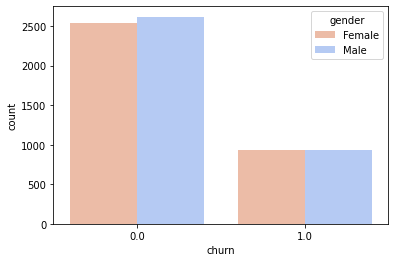

In [74]:
sns.countplot(x='churn',data=df,hue='gender',palette="coolwarm_r")

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

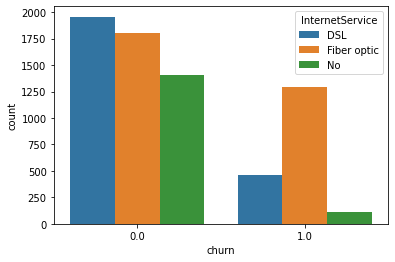

In [75]:
sns.countplot(x='churn',data=df, hue='InternetService')

We can see that people using Fiber-optic services have a higher churn percentage. This shows that the company needs to improve their Fiber-optic service.

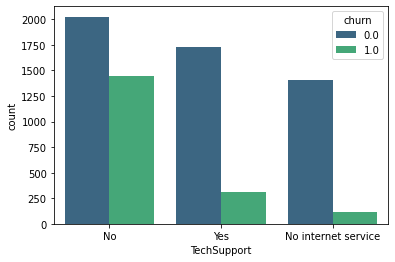

In [76]:
sns.countplot(x='TechSupport',data=df, hue='churn',palette='viridis')

Those customers who don’t have tech support have churned more, which is
pretty self-explanatory. This also highlights the fact that the tech
support provided by the company is up to the mark.

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Tenure in Months')]

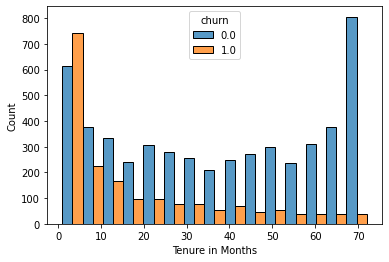

In [77]:
ax = sns.histplot(x = 'tenure', hue = 'churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

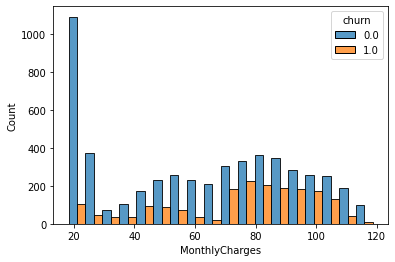

In [78]:
sns.histplot(x='MonthlyCharges',hue='churn',data=df,multiple='dodge')

We cannot see a definite pattern in this, but we can conclude that those who have monthly charges as high as 100 dollars have chosen not to churn. This indicates that the company has done well to retain high paying customers.

#What percentage of users have churned?

In [79]:
churn = len(df[df['churn'] == 1])
percent_churn = round(churn / len(df) * 100, 2)
percent_churn

26.58

#DATA CLEANING

Mean Normalization

In [80]:
#the column 'Tenure' contains the number of months that the customer has been with the company. As we have said, we need to normalize it using this simple function. We are telling our code that this column ('Tenure') will now be equal this mean normalization operation.

df['tenure']=(df['tenure']-df['tenure'].mean())/df['tenure'].std() 

# Monthly charge is the amount in $ of how much the customer pays every month. We also need to normalize it.
df['MonthlyCharges']=(df['MonthlyCharges']-df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()

# Total charge is the amount in $ that  the customer has paid throughout their life. It is the LTV for each customer. We also need to normalize it.
df['TotalCharges']=(df['TotalCharges']-df['TotalCharges'].mean())/df['TotalCharges'].std()

#Let's again print our first ten rows to see how the content of these three columns have changed.
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,-1.280157,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161611,-0.994123,0.0
5575-GNVDE,Male,0,No,No,0.064298,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260859,-0.173727,0.0
3668-QPYBK,Male,0,No,No,-1.239416,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363897,-0.959581,1.0
7795-CFOCW,Male,0,No,No,0.512450,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747797,-0.195234,0.0
9237-HQITU,Female,0,No,No,-1.239416,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196164,-0.940391,1.0
9305-CDSKC,Female,0,No,No,-0.994970,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.158407,-0.645323,1.0
1452-KIOVK,Male,0,No,Yes,-0.424595,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.807745,-0.147302,0.0
6713-OKOMC,Female,0,No,No,-0.913487,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,-1.164935,-0.874107,0.0
7892-POOKP,Female,0,Yes,No,-0.180148,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1.329583,0.336492,1.0


Mean Normalization Done!
Those three numerical columns ['Tenure, MonthlyCharges, TotalCharges'] have all been reduced to the same scale.

After taking another look at our data, this is the list of columns I found that can be reduced to 1s or 0s:

['Gender'],['Partner'],['Dependents'],['PhoneService'],[MultipleLines''],['OnlineSecurity '],['OnlineBackup'],['DeviceProtection'], ['TechSupport'], ['StreamingTV'], ['StreamingMovies'], ['PaperlessBilling']

In [81]:
df['gender']=df['gender'].apply(lambda x:1 if x=='Female' else 0) # Note here that unlike the other column, the keyword is "Female" not "Yes", however it is of course still binary class.
df['Partner']=df['Partner'].apply(lambda x:1 if x=='Yes' else 0)
df['Dependents']=df['Dependents'].apply(lambda x:1 if x=='Yes' else 0)
df['PhoneService']=df['PhoneService'].apply(lambda x:1 if x=='Yes' else 0)
df['MultipleLines']=df['MultipleLines'].apply(lambda x:1 if x=='Yes' else 0)
df['OnlineSecurity']=df['OnlineSecurity'].apply(lambda x:1 if x=='Yes' else 0)
df['OnlineBackup']=df['OnlineBackup'].apply(lambda x:1 if x=='Yes' else 0)
df['DeviceProtection']=df['DeviceProtection'].apply(lambda x:1 if x=='Yes' else 0)
df['TechSupport']=df['TechSupport'].apply(lambda x:1 if x=='Yes' else 0)
df['StreamingTV']=df['StreamingTV'].apply(lambda x:1 if x=='Yes' else 0)
df['StreamingMovies']=df['StreamingMovies'].apply(lambda x:1 if x=='Yes' else 0)
df['PaperlessBilling']=df['PaperlessBilling'].apply(lambda x:1 if x=='Yes' else 0)

# Let's again print out our 10 first rows to see what the data now looks like.

df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,-1.161611,-0.994123,0.0
5575-GNVDE,0,0,0,0,0.064298,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,-0.260859,-0.173727,0.0
3668-QPYBK,0,0,0,0,-1.239416,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,-0.363897,-0.959581,1.0
7795-CFOCW,0,0,0,0,0.512450,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),-0.747797,-0.195234,0.0
9237-HQITU,1,0,0,0,-1.239416,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.196164,-0.940391,1.0
9305-CDSKC,1,0,0,0,-0.994970,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,1.158407,-0.645323,1.0
1452-KIOVK,0,0,0,1,-0.424595,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),0.807745,-0.147302,0.0
6713-OKOMC,1,0,0,0,-0.913487,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,-1.164935,-0.874107,0.0
7892-POOKP,1,0,1,0,-0.180148,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,1.329583,0.336492,1.0


Some of our columns do not have binary outcomes, but rather they contain three or more possible text values. For instance, the column ['InternetService'], which tells what type of internet service the customer is using, has the following possible outcomes


*   Fiber optic
*   DSL

*   No Internet

In [82]:
# This handy command ".value_counts()" give us all the different values of the ['InternetService'] column and the number of times they appear.

df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [83]:
# This takes all the different values (here denominated as 'keys') of the column ['InternetService']
# Here we iteratively create one new column for each value of the ['InternetService'] column. 
#In this particular case, we will be creating three new columns, whose values will either be 1 or 0 based on whether the original column contained that value or not.

for x in df['InternetService'].value_counts().keys(): 
      df[x]=df['InternetService'].apply(lambda d: 1 if d==x else 0)
    
# As discussed previously, we now ditch the original column ['InternetService'], we no longer need it!    
df.drop(columns=['InternetService'], inplace=True)


# As always let's have a look at what our datasheet now looks like. The new columns are the last three !
df.head(10)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,Fiber optic,DSL,No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,-1.161611,-0.994123,0.0,0,1,0
5575-GNVDE,0,0,0,0,0.064298,1,0,1,0,1,...,0,One year,0,Mailed check,-0.260859,-0.173727,0.0,0,1,0
3668-QPYBK,0,0,0,0,-1.239416,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,-0.363897,-0.959581,1.0,0,1,0
7795-CFOCW,0,0,0,0,0.512450,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),-0.747797,-0.195234,0.0,0,1,0
9237-HQITU,1,0,0,0,-1.239416,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,0.196164,-0.940391,1.0,1,0,0
9305-CDSKC,1,0,0,0,-0.994970,1,1,0,0,1,...,1,Month-to-month,1,Electronic check,1.158407,-0.645323,1.0,1,0,0
1452-KIOVK,0,0,0,1,-0.424595,1,1,0,1,0,...,0,Month-to-month,1,Credit card (automatic),0.807745,-0.147302,0.0,1,0,0
6713-OKOMC,1,0,0,0,-0.913487,0,0,1,0,0,...,0,Month-to-month,0,Mailed check,-1.164935,-0.874107,0.0,0,1,0
7892-POOKP,1,0,1,0,-0.180148,1,1,0,0,1,...,1,Month-to-month,1,Electronic check,1.329583,0.336492,1.0,1,0,0


Looking through our data, we can see that we need to perform the same procedure on the ['Contract'] column, which informs us what type of contract our user has.] There are obviously more than two options as we can see below:

In [84]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [85]:
#Getting the value within the original columns
for x in df['Contract'].value_counts().keys():
    df[x]=df['Contract'].apply(lambda d: 1 if d==x else 0)#Creating the new columns, containing either 1s or 0s
    
df.drop(columns=['Contract'], inplace=True) # delete the original column

df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,churn,Fiber optic,DSL,No,Month-to-month,Two year,One year
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,0,1,0,...,Electronic check,-1.161611,-0.994123,0.0,0,1,0,1,0,0
5575-GNVDE,0,0,0,0,0.064298,1,0,1,0,1,...,Mailed check,-0.260859,-0.173727,0.0,0,1,0,0,0,1
3668-QPYBK,0,0,0,0,-1.239416,1,0,1,1,0,...,Mailed check,-0.363897,-0.959581,1.0,0,1,0,1,0,0
7795-CFOCW,0,0,0,0,0.512450,0,0,1,0,1,...,Bank transfer (automatic),-0.747797,-0.195234,0.0,0,1,0,0,0,1
9237-HQITU,1,0,0,0,-1.239416,1,0,0,0,0,...,Electronic check,0.196164,-0.940391,1.0,1,0,0,1,0,0
9305-CDSKC,1,0,0,0,-0.994970,1,1,0,0,1,...,Electronic check,1.158407,-0.645323,1.0,1,0,0,1,0,0
1452-KIOVK,0,0,0,1,-0.424595,1,1,0,1,0,...,Credit card (automatic),0.807745,-0.147302,0.0,1,0,0,1,0,0
6713-OKOMC,1,0,0,0,-0.913487,0,0,1,0,0,...,Mailed check,-1.164935,-0.874107,0.0,0,1,0,1,0,0
7892-POOKP,1,0,1,0,-0.180148,1,1,0,0,1,...,Electronic check,1.329583,0.336492,1.0,1,0,0,1,0,0


And finally, let's do the same for the column ['PaymentMethod'], which indicates what type of Payment the customer uses

In [86]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

Looks like we have 4 different possibilities here. 

In [87]:
for x in df['PaymentMethod'].value_counts().keys():#Getting the value within the original columns
    df[x]=df['PaymentMethod'].apply(lambda d: 1 if d==x else 0)#Creating the new columns, containing either 1s or 0s
    
df.drop(columns=['PaymentMethod'], inplace=True) # delete the original column

#Let's now have a look a our data:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0,0.064298,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,0,-1.239416,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0,0.512450,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
9237-HQITU,1,0,0,0,-1.239416,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,1,0,0,0,-0.994970,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,0,1,-0.424595,1,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,1,0,0,0,-0.913487,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
7892-POOKP,1,0,1,0,-0.180148,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0


In [88]:
#Using the ".to_excel" command to create a .xlsx file containing the newly formatted"data".
df.to_excel('Telco_Churn_Formatted_For_ML.xlsx')

Feature Selection

In [89]:
# Split Data
x = df.drop(columns='churn')
y = df['churn']

In [90]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.280157,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0,0.064298,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,0,-1.239416,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0,0.512450,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
9237-HQITU,1,0,0,0,-1.239416,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [91]:
y.head()

customerID
7590-VHVEG    0.0
5575-GNVDE    0.0
3668-QPYBK    1.0
7795-CFOCW    0.0
9237-HQITU    1.0
Name: churn, dtype: float64

In [92]:
x.shape, y.shape

((7032, 26), (7032,))

#Exploring Correlation

In [93]:
# We create an iterative operation ( also known as a "For Loop") to get the correlation between each column and the churn metric (y))

for columnname in x.columns: 
    print('The Correlation Between',columnname,'and Churn is:', abs(x[columnname].corr(y)))
    
#the outcome of the operation is to print out the correlation coefficient along with a text for clarity purpose.
#we use the ".corr()" command to calculate the correlation and the "abs" to always return a positive number, we don't care whether the correlation is negative or positive, we just want to check that there is one!

The Correlation Between gender and Churn is: 0.008544643224946458
The Correlation Between SeniorCitizen and Churn is: 0.15054105341568094
The Correlation Between Partner and Churn is: 0.1499819256200587
The Correlation Between Dependents and Churn is: 0.16312843938822044
The Correlation Between tenure and Churn is: 0.3540493589532506
The Correlation Between PhoneService and Churn is: 0.011691398865421365
The Correlation Between MultipleLines and Churn is: 0.04003273987252132
The Correlation Between OnlineSecurity and Churn is: 0.1712699235334987
The Correlation Between OnlineBackup and Churn is: 0.08230696876508198
The Correlation Between DeviceProtection and Churn is: 0.06619251684228528
The Correlation Between TechSupport and Churn is: 0.1647159083441067
The Correlation Between StreamingTV and Churn is: 0.0632539802751934
The Correlation Between StreamingMovies and Churn is: 0.06085993668145853
The Correlation Between PaperlessBilling and Churn is: 0.19145432108004626
The Correlation

#Applying ML Models

In [94]:
from sklearn.ensemble import ExtraTreesClassifier
from collections import OrderedDict

In [95]:
#We create the Decision Tree algorithm, simply by loading it from the Sklearn library in a single line.

feature_importance_indicator=ExtraTreesClassifier(n_estimators = 100)

#Then we ask this algorithm, now dubbed as "feature_importance_indicator", to learn from our data x ( the indicators) and y( the churn outcome):

feature_importance_indicator.fit(x,y)

#We then ask the model politely to create a list of which columns it learnt the most from and which columns didn't help it at all, for this we use the "feature_importances_" command:

importance_dict= dict(zip(x.columns, (feature_importance_indicator.feature_importances_)))

#We sort the list in descending order so that it is quicker to analyse.

importance_dict_sorted= OrderedDict(sorted(importance_dict.items(), key=lambda x:x[1],reverse=1))

#The "pprint" commnad allows us to print things out nicely.

print(importance_dict_sorted) 


OrderedDict([('TotalCharges', 0.15022293910054793), ('tenure', 0.14147287055944127), ('MonthlyCharges', 0.12944075285694862), ('Month-to-month', 0.0735908139237892), ('Fiber optic', 0.04626323686617199), ('gender', 0.03769114550814087), ('Partner', 0.03123358194094936), ('PaperlessBilling', 0.029926061935188944), ('Electronic check', 0.029194727239544492), ('OnlineBackup', 0.027859616045671724), ('SeniorCitizen', 0.026484223165459533), ('OnlineSecurity', 0.025668637957589276), ('DeviceProtection', 0.025347673887001203), ('Dependents', 0.025144529579183755), ('MultipleLines', 0.024998939778370494), ('TechSupport', 0.0249183966437738), ('Two year', 0.024250984158400143), ('StreamingMovies', 0.022805915650256834), ('StreamingTV', 0.02219637156907371), ('No', 0.014453546096733563), ('Credit card (automatic)', 0.013285597814113674), ('Bank transfer (automatic)', 0.012754347300390476), ('One year', 0.011483142374928357), ('Mailed check', 0.011230050820324276), ('DSL', 0.01034662103043482), (

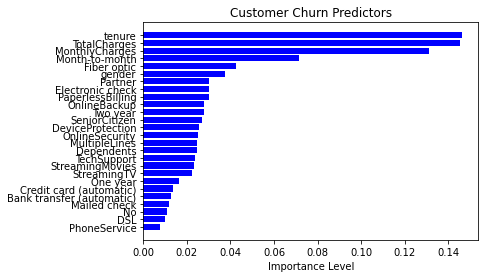

In [96]:
feature_importance_indicator.fit(x,y)
features = x.columns
importances = feature_importance_indicator.feature_importances_
indices = np.argsort(importances)

plt.title('Customer Churn Predictors')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance Level')
plt.show()

Dropping some columns which we feel are unnecessary

In [97]:
x.drop(columns=['gender','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],inplace=True)

In [98]:
x.head(10)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,-1.280157,0,0,1,-1.161611,-0.994123,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0.064298,1,0,0,-0.260859,-0.173727,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,-1.239416,1,0,1,-0.363897,-0.959581,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0.512450,1,1,0,-0.747797,-0.195234,0,1,0,0,0,1,0,0,1,0
9237-HQITU,0,0,0,-1.239416,0,0,1,0.196164,-0.940391,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,0,0,0,-0.994970,0,0,1,1.158407,-0.645323,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,1,-0.424595,0,0,1,0.807745,-0.147302,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,0,0,0,-0.913487,1,0,0,-1.164935,-0.874107,0,1,0,1,0,0,0,1,0,0
7892-POOKP,0,1,0,-0.180148,0,1,1,1.329583,0.336492,1,0,0,1,0,0,1,0,0,0


In [99]:
# Train-Test-Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 18)

#Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
prediction_logreg=logreg.predict(x_test)
print(accuracy_score(y_test,prediction_logreg))

0.8059701492537313


In [104]:
#We initialize the following variables that help us count the number of True Positives, False Positives, etc.
TP=0
FP=0
TN=0
FN=0


#We use a loop to count the number of TN, TP, TN, FN. Each time we detech one, we add a '1' to the corresponding variable
for i in range(len(x_test)):
  
    if logreg.predict(x_test.iloc[[i,]])==1 and y_test.iloc[i]==1:
                                       TP=TP+1
    if logreg.predict(x_test.iloc[[i,]])==1 and y_test.iloc[i]==0:
                                       FP=FP+1      
    if logreg.predict(x_test.iloc[[i,]])==0 and y_test.iloc[i]==0:
                                      TN=TN+1    
                                      
    if logreg.predict(x_test.iloc[[i,]])==0 and y_test.iloc[i]==1:
                                       FN=FN+1   
#Printing our results
print ("Logistic Regression", "\nTrue Positives:",TP, "\nFalse Positives:",FP,"\nTrue Negatives:",TN , "\nFalse Negatives:", FN) 


#Calculating the 'Recall' metric with this simple formula
log_recall=TP/(TP+FN)

#Printing our the 'Recall' metric in %
print("Logistic Regression Recall On Training Data:", log_recall *100,'%')



Logistic Regression 
True Positives: 187 
False Positives: 99 
True Negatives: 947 
False Negatives: 174
Logistic Regression Recall On Training Data: 51.8005540166205 %


We'll imagine that we've been given a 90% recall threshold as our target. We want our algorithms to detect if a customer is going to churn 90% of the time.

After running our algorithm for the first time, we see we have a recall rate of 51%, not good enough, our model is only able to recognize the churned customer 51% of the time.

Model Optimization
We will now optimize our model. As discussed earlier, we want to be sure to catch all the churned customers. This means we need to ask our model to be more biased ( at the moment it is treating the churned class (1) and the non-churned (0) with the same importance (50-50). We can now ask our model to give more priority to churning customers (those with 1 value). Let's first try a 70-30 approach.

In [105]:
#we initialize a class weights for our two labels : 1 (churned) and 0 (churned) at 70-30

class_weights ={1: 0.70, 0: 0.30}

#we create a new logistic regression model optimized for a better recall and retrain it on our data
logistic_regression_opt= LogisticRegression(class_weight=class_weights)
logistic_regression_opt.fit(x_train,y_train)

LogisticRegression(class_weight={0: 0.3, 1: 0.7})

In [106]:
TP=0
TN=0
FP=0
FN=0

for i in range(len(x_test)):
    if logistic_regression_opt.predict(x_test.iloc[[i,]])==1 and y_test.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression_opt.predict(x_test.iloc[[i,]])==1 and y_test.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression_opt.predict(x_test.iloc[[i,]])==0 and y_test.iloc[i]==0:
                                       TN=TN+1    
                                       
    if logistic_regression_opt.predict(x_test.iloc[[i,]])==0 and y_test.iloc[i]==1:
                                       FN=FN+1   

print ("Logistic Regression", "\nTrue Positives:",TP, "\nFalse Positives:",FP,"\nTrue Negatives:",TN , "\nFalse Negatives:", FN) 

log_recall=TP/(TP+FN)

print("Logistic Regression Recall On Training Data:", log_recall *100,'%')

Logistic Regression 
True Positives: 274 
False Positives: 254 
True Negatives: 792 
False Negatives: 87
Logistic Regression Recall On Training Data: 75.90027700831024 %


In order to reach our 90% target, let´s try an even more skewed model, with a 85-15% split prioritization for the churned customers

In [107]:
#Update the weights to 85-15%
class_weights ={1: 0.85, 0: 0.15}

#Retrain the algorithm
logistic_regression_opt= LogisticRegression(class_weight=class_weights)
logistic_regression_opt.fit(x_train,y_train)

LogisticRegression(class_weight={0: 0.15, 1: 0.85})

In [108]:
#Re-evaluating the model on the 85-15 split.

TP=0
TN=0
FP=0
FN=0

for i in range(len(x_test)):
  
    if logistic_regression_opt.predict(x_test.iloc[[i,]])==1 and y_test.iloc[i]==1:
                                       TP=TP+1
    if logistic_regression_opt.predict(x_test.iloc[[i,]])==1 and y_test.iloc[i]==0:
                                       FP=FP+1      
    if logistic_regression_opt.predict(x_test.iloc[[i,]])==0 and y_test.iloc[i]==0:
                                       TN=TN+1    
                                       
    if logistic_regression_opt.predict(x_test.iloc[[i,]])==0 and y_test.iloc[i]==1:
                                       FN=FN+1   

print ("Logistic Regression", "\nTrue Positives:",TP, "\nFalse Positives:",FP,"\nTrue Negatives:",TN , "\nFalse Negatives:", FN) 

log_recall=TP/(TP+FN)

print("Logistic Regression Recall On Training Data:", log_recall *100,'%')

Logistic Regression 
True Positives: 331 
False Positives: 448 
True Negatives: 598 
False Negatives: 30
Logistic Regression Recall On Training Data: 91.68975069252078 %


Done. Our recall has now reached 91 % ! This means that when given the testing data that our model had not previously seen, the model was able to predict a customer churning 91% of the time. We have reached our target!

Here, you will note that as expected, our number of False Negatives fell sharply ( from 175 to 30) while the number of True Positives almost doubled as a consequence ( from 186 to 331). However, as a trade-off, the number of False Positives rose significantly ( from 99 to 449). We can live with this because as previously discussed, the consequences of a False Positive are vastly smaller in comparison to a False Negative.

#ROC Curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


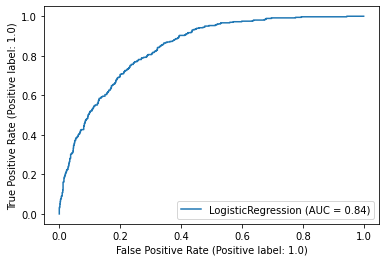

In [109]:
lr = plot_roc_curve(logistic_regression_opt, x_test, y_test)

#Neural Network

In [110]:
x_train.shape, y_train.shape

((5625, 19), (5625,))

In [111]:
x_train.shape[1]

19

In [112]:
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,
9142-XMYJH,0,0,0,-0.139407,0,0,0,-1.510611,-0.741892,0,0,1,1,0,0,0,0,0,1
5138-WVKYJ,0,0,0,-0.913487,1,0,0,1.121845,-0.562364,1,0,0,1,0,0,1,0,0,0
8277-RVRSV,0,1,1,0.023557,0,0,0,-1.351068,-0.654235,0,0,1,0,0,1,0,0,0,1
6968-MHOMU,0,1,0,1.042084,0,0,1,-0.658054,0.179131,0,1,0,0,0,1,0,0,0,1
9798-DRYDS,0,1,1,-0.628300,0,1,1,-0.094669,-0.534946,0,1,0,0,0,1,0,1,0,0


In [113]:
ohe = OneHotEncoder(use_cat_names=True)

ohe.fit(x_train)

XT_train = ohe.transform(x_train)
XT_test = ohe.transform(x_test)

In [114]:
XT_train.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,
9142-XMYJH,0,0,0,-0.139407,0,0,0,-1.510611,-0.741892,0,0,1,1,0,0,0,0,0,1
5138-WVKYJ,0,0,0,-0.913487,1,0,0,1.121845,-0.562364,1,0,0,1,0,0,1,0,0,0
8277-RVRSV,0,1,1,0.023557,0,0,0,-1.351068,-0.654235,0,0,1,0,0,1,0,0,0,1
6968-MHOMU,0,1,0,1.042084,0,0,1,-0.658054,0.179131,0,1,0,0,0,1,0,0,0,1
9798-DRYDS,0,1,1,-0.628300,0,1,1,-0.094669,-0.534946,0,1,0,0,0,1,0,1,0,0


In [115]:
# Create NN Model

model = Sequential()

model.add(Dense(250, input_dim=XT_train.shape[1], activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(XT_train, y_train, validation_data=(XT_test, y_test), epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4630 - accuracy: 0.7687 - val_loss: 0.4193 - val_accuracy: 0.7996
Epoch 2/5
176/176 [==============================] - 1s 3ms/step - loss: 0.4226 - accuracy: 0.7979 - val_loss: 0.4159 - val_accuracy: 0.7953
Epoch 3/5
176/176 [==============================] - 1s 3ms/step - loss: 0.4188 - accuracy: 0.8027 - val_loss: 0.4142 - val_accuracy: 0.7996
Epoch 4/5
176/176 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8018 - val_loss: 0.4145 - val_accuracy: 0.7946
Epoch 5/5
176/176 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.8078 - val_loss: 0.4146 - val_accuracy: 0.8003


In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 250)               5000      
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [117]:
_, train_acc = model.evaluate(XT_train, y_train)
_, test_acc = model.evaluate(XT_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8003


In [118]:
model.predict(XT_test)

44/44 [==============================] - 0s 1ms/step


array([[0.7178928 ],
       [0.1048624 ],
       [0.04716723],
       ...,
       [0.20378593],
       [0.08586581],
       [0.09551383]], dtype=float32)

#Customer Segmentation

#RFM Analysis

In [119]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0.0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


In [120]:
rfm_df = df1.filter(['customerID','tenure','Contract','TotalCharges'], axis=1)

In [121]:
rfm_df.head()

,tenure,Contract,TotalCharges
customerID,,,
7590-VHVEG,1,Month-to-month,29.85
5575-GNVDE,34,One year,1889.50
3668-QPYBK,2,Month-to-month,108.15
7795-CFOCW,45,One year,1840.75
9237-HQITU,2,Month-to-month,151.65


In [122]:
dict1 = {'Month-to-month':30, 'One year':365, 'Two year':730}
print(dict1)

{'Month-to-month': 30, 'One year': 365, 'Two year': 730}


In [123]:
rfm_df = rfm_df.replace({"Contract": dict1})

In [124]:
rfm_df.head()

,tenure,Contract,TotalCharges
customerID,,,
7590-VHVEG,1,30,29.85
5575-GNVDE,34,365,1889.50
3668-QPYBK,2,30,108.15
7795-CFOCW,45,365,1840.75
9237-HQITU,2,30,151.65


In [125]:
rfm_df.columns = ['frequency','recency','monetary']

In [126]:
#First we need the quartiles:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,frequency,recency,monetary
0.25,9.0,30.0,401.4500
0.50,29.0,30.0,1397.4750
0.75,55.0,365.0,3794.7375


In [127]:
quantiles.to_dict()

{'frequency': {0.25: 9.0, 0.5: 29.0, 0.75: 55.0},
 'recency': {0.25: 30.0, 0.5: 30.0, 0.75: 365.0},
 'monetary': {0.25: 401.45, 0.5: 1397.475, 0.75: 3794.7375}}

In [128]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def fmscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [129]:
#create rfm segmentation table

rfm_df['r_quartile'] = rfm_df['recency'].apply(rscore, args=('recency',quantiles,))
rfm_df['f_quartile'] = rfm_df['frequency'].apply(fmscore, args=('frequency',quantiles,))
rfm_df['m_quartile'] = rfm_df['monetary'].apply(fmscore, args=('monetary',quantiles,))

In [130]:
rfm_df['rfmscore'] = rfm_df.r_quartile.map(str) \
                            + rfm_df.f_quartile.map(str) \
                            + rfm_df.m_quartile.map(str)
rfm_df.head()

,frequency,recency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
customerID,,,,,,,
7590-VHVEG,1,30,29.85,4,1,1,411
5575-GNVDE,34,365,1889.50,2,3,3,233
3668-QPYBK,2,30,108.15,4,1,1,411
7795-CFOCW,45,365,1840.75,2,3,3,233
9237-HQITU,2,30,151.65,4,1,1,411


Highest Recency score = 4: most recently purchase.


Highest Frequency score = 3: most quantity purchase.

Highest Monetary score = 3: spent the most.

In [131]:
#We can sort the dataframe based on "rfmscore" and see our most important customers

rfm_df.sort_values('rfmscore',ascending=False)

,frequency,recency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
customerID,,,,,,,
0324-BRPCJ,68,30,6851.65,4,4,4,444
6377-WHAOX,60,30,6411.25,4,4,4,444
3768-NLUBH,57,30,5746.15,4,4,4,444
0979-PHULV,69,30,7007.60,4,4,4,444
9614-RMGHA,65,30,5940.85,4,4,4,444
...,...,...,...,...,...,...,...
9424-CMPOG,9,730,197.40,1,1,1,111
6505-OZNPG,6,730,348.80,1,1,1,111
2017-CCBLH,8,730,141.60,1,1,1,111


In [132]:
rfm_df.to_csv("rfm_analysis.csv")

In [133]:
#We create labels

print("stars: ",len(rfm_df[rfm_df['rfmscore']=='444']))
print('loyals: ',len(rfm_df[rfm_df['f_quartile']==4]))#Customers who buy the most often
print("big_spenders: ",len(rfm_df[rfm_df['m_quartile']==4]))#Customers who have generated the most revenue
print('rookies: ', len(rfm_df[rfm_df['rfmscore']=='411']))# First time buyers on the store
print('at_risk: ',len(rfm_df[rfm_df['rfmscore']=='144']))#good past customers who haven't bought recently
print('lost: ',len(rfm_df[rfm_df['rfmscore']=='111']))

stars:  165
loyals:  1755
big_spenders:  1758
rookies:  1411
at_risk:  744
lost:  36
